<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_surface_runoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-------------------------------------------#
#     Import Packages & Connect to Drive    #
#-------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/fwt_irrigation_runoff/mason_creek_field_current_conditions.csv')

In [ ]:
file

,field_id,tft_id,acres,irr_type,crop_type_2023,crop_type_2022,crop_type_2021,crop_type_2020,crop_type_2019,crop_type_2018,...,month,flow,organic_n,surface_n,organic_p,soluble_p,sediment,deep_percolation,precipitation,irrigation_applied
0,30925,43.56688-116.47252,5.724000,Not Irrigated,Grassland/Pasture,Grassland/Pasture,Alfalfa,Alfalfa,Alfalfa,Alfalfa,...,annual,0.032987,0.064166,0.004221,0.024333,0.005257,0.018201,0.000000,11.04972,0.0
1,30885,43.54024-116.36099,8.038000,Not Irrigated,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,...,annual,0.933003,0.001434,0.003290,0.000211,0.002510,0.000042,0.075559,10.87124,0.0
2,4163,43.65501-116.60483,12.299998,Not Irrigated,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,...,annual,0.071779,0.000000,0.000000,0.000000,0.000000,0.000000,0.003505,10.39413,0.0
3,34516,43.60200-116.43726,12.306000,Not Irrigated,Grassland/Pasture,Fallow/Idle Cropland,Sweet Corn,Dry Beans,Corn,Developed/Open Space,...,annual,1.619982,0.607599,12.413554,0.133720,0.396121,0.100568,0.000000,11.04972,0.0
4,30807,43.54734-116.38324,8.784000,Not Irrigated,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,...,annual,0.004677,0.000092,0.001060,0.000069,0.001521,0.000023,0.000000,10.87124,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,24811,43.54602-116.47242,5.650000,Flood,Mint,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Herbs,...,jan,0.000212,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
15102,24811,43.54602-116.47242,5.650000,Flood,Mint,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Herbs,...,jul,17.372645,2.083596,0.016225,0.379226,1.851151,0.563226,NaN,NaN,NaN
15103,24811,43.54602-116.47242,5.650000,Flood,Mint,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Herbs,...,jun,16.060074,1.930663,0.204305,0.449022,2.468754,0.544132,NaN,NaN,NaN
15104,24811,43.54602-116.47242,5.650000,Flood,Mint,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Herbs,...,mar,0.181066,0.000000,0.000752,0.000000,0.000666,0.000000,NaN,NaN,NaN


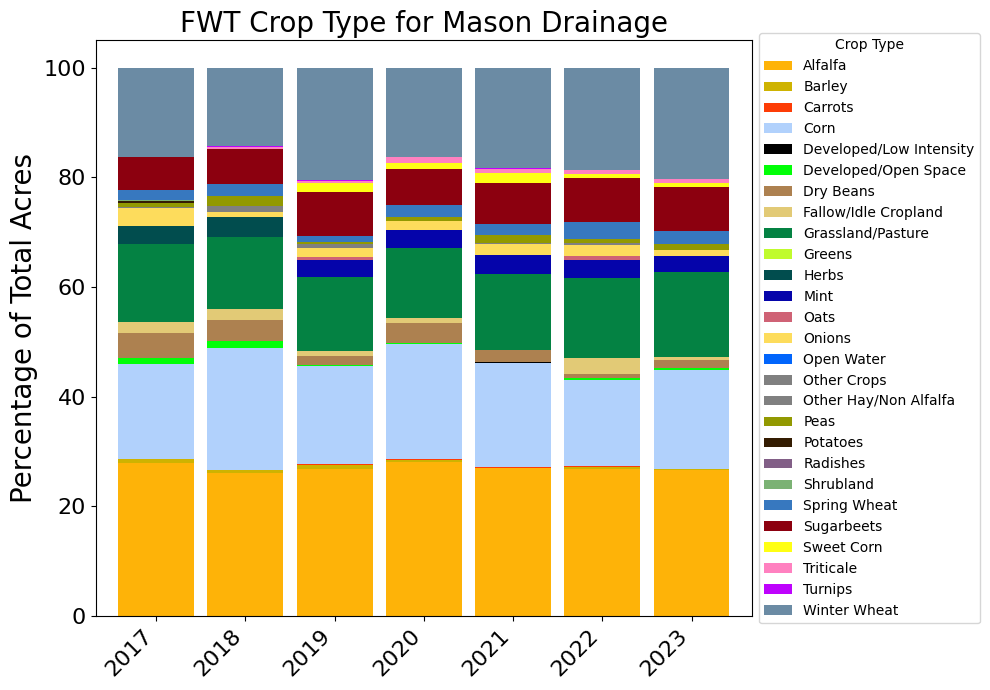

In [43]:
# --------------------------- #
# Last 7 years of crop rotation
# --------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/fwt_irrigation_runoff/mason_creek_field_current_conditions.csv')

# Define years and column names
years = range(2017, 2024)
crop_type_columns = [f'crop_type_{year}' for year in years]
acres_column = 'acres'

# Create a list for melted data
melted_df_list = []

# Loop through each year and combine crop types and acres
for year, crop_col in zip(years, crop_type_columns):
    temp_df = df[[crop_col, acres_column]].copy()
    temp_df.columns = ['CropType', 'Acres']
    temp_df['Year'] = year
    melted_df_list.append(temp_df)

# Concatenate melted data
melted_df = pd.concat(melted_df_list, ignore_index=True)
melted_df['Total_Acres'] = melted_df.groupby('Year')['Acres'].transform('sum')  # Calculate total acres per year to calculate percentages
melted_df['Percentage'] = (melted_df['Acres'] / melted_df['Total_Acres']) * 100  # Calculate percentage for each crop type per year
pivot_df = melted_df.pivot_table(index='Year', columns='CropType', values='Percentage', aggfunc='sum', fill_value=0)

# Define custom color palette
crop_palette = {
    "Corn": "xkcd:powder blue",
    "Sweet Corn": "xkcd:yellow",
    "Dry Beans": "xkcd:light brown",
    "Greens": "xkcd:yellow green",
    "Spring Wheat": "xkcd:windows blue",
    "Mint": "xkcd:royal blue",
    "Fallow/Idle Cropland": "xkcd:sand",
    "Winter Wheat": "xkcd:grey blue",
    "Sugar Crop": "xkcd:greyish",
    "Alfalfa": "xkcd:amber",
    "Onions": "xkcd:light gold",
    "Shrubland": "xkcd:faded green",
    "Herb": "xkcd:washed out green",
    "Peas": "xkcd:pea soup",
    "Oats": "xkcd:rose",
    "Other": "xkcd:light grey",
    "Herbs": "xkcd:dark teal",
    "Grassland/Pasture": "xkcd:jungle green",
    "Radishes": "xkcd:dusty purple",
    "Turnips": "xkcd:bright purple",
    "Developed/Low Intensity": "xkcd:black",
    "Developed/Open Space": "xkcd:bright green",
    "Barley": "xkcd:mustard",
    "Sugarbeets": "xkcd:crimson",
    "Carrots": "xkcd:red orange",
    "Potatoes": "xkcd:dark brown",
    "Triticale": "xkcd:pink",
    "Open Water": "xkcd:bright blue"
}

# Match colors in the order of CropType columns
colors = [crop_palette.get(crop, "grey") for crop in pivot_df.columns]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))
pivot_df.plot(kind='bar', stacked=True, ax=ax, width=0.85, color=colors)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Crop Type")

# Add labels and title
plt.ylabel('Percentage of Total Acres', fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('', fontsize=20 )
plt.xticks(fontsize=16,rotation=45, ha='right')
plt.title('FWT Crop Type for Mason Drainage', fontsize = 20)

plt.tight_layout()
plt.show()

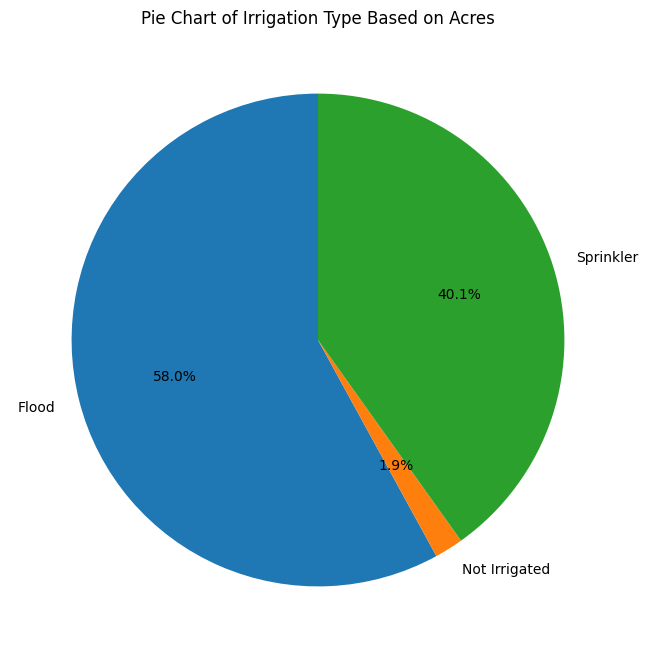

In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/Data/Mason Water Budget/data_input/fwt_irrigation_runoff/mason_creek_field_current_conditions.csv'
df = pd.read_csv(file_path)

# Group the data by 'irr_type' and sum the 'acres' for each type
irr_type_acres = df.groupby('irr_type')['acres'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(irr_type_acres, labels=irr_type_acres.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of Irrigation Type Based on Acres')

# Display the pie chart
plt.show()